<a href="https://colab.research.google.com/github/niksche/Diploma-thesis-Designing-communications-satellite-/blob/master/antenna-reflector-dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:


def vectorfield(w, t, p):
    """
    Defines the differential equations for the system of differential equations.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,z1,x2,z2]
        t :  time
        p :  vector of the parameters:
                  p = [m, mu, k, L]
    """
    x1, z1, x2, z2 = w

    # could i just replcae this thing with an indexed version? 
    m, mu, k, L = p
  
    # Create f = (x1',y1',x2',y2'):
    f = [z1,
         (-mu * z1 -2*k*x1 + k*x2) / m,
         z2,
         (-mu * z2 + k * x1 - k * x2 + k*L)/m
         ]
    return f
    

In [75]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the system of differential equations.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,z1,x2,z2]
        t :  time
        p :  vector of the parameters:
                  p = [m, mu, k, L]
    """
    # x1, z1, x2, z2 = w

    # could i just replcae this thing with an indexed version? 
    m, mu, k, L = p
  
    # Create f = (x1',y1',x2',y2'):
    f = [w[1],
         (-mu * w[1] -2*k*w[0] + k*w[2]) / m,
         w[3],
         (-mu * w[3] + k * w[0] - k * w[2] + k*L)/m
         ]
    return f

In [76]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m = 1.0


# Natural lengths
L = 1


# Spring coefficients
k = 1337

W0 = 1

k = 2 * W0 / L**2

# Friction coefficients
mu = 2

# Initial conditions
# x1 and x2 are the initial displacements; z1 and z2 are the initial velocities
x1 = 0.0
z1 = 0.0
x2 = 0.2
z2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m, mu, k, L]
w0 = [x1, z1, x2, z2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('reflector-dynamics.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

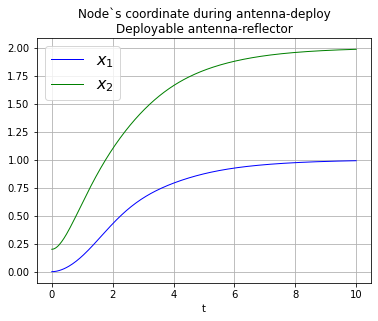

In [77]:
from numpy import loadtxt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

t, x1, z1, x2, z2 = loadtxt('reflector-dynamics.dat', unpack=True)

plt.figure(1, figsize=(6, 4.5))

plt.xlabel('t')
plt.grid(True)
# plt.hold(True)
lw = 1

plt.plot(t, x1, 'b', linewidth=lw)
plt.plot(t, x2, 'g', linewidth=lw)

plt.legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
plt.title('Node`s coordinate during antenna-deploy\nDeployable antenna-reflector')
plt.savefig('reflector\`s_coordinates.png', dpi=100)




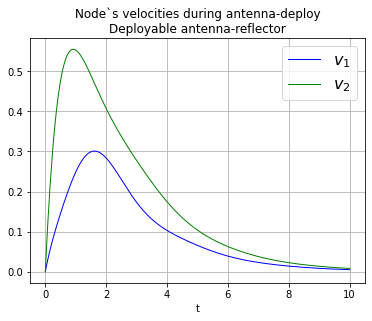

In [8]:

plt.figure(1, figsize=(6, 4.5))

plt.xlabel('t')
plt.grid(True)
# plt.hold(True)
lw = 1

plt.plot(t, z1, 'b', linewidth=lw)
plt.plot(t, z2, 'g', linewidth=lw)

plt.legend((r'$v_1$', r'$v_2$'), prop=FontProperties(size=16))
plt.title('Node`s velocities during antenna-deploy\nDeployable antenna-reflector')
plt.savefig('reflector\`s_velocities.png', dpi=100)


In [11]:
import matplotlib.animation as animation
# Plot the solution that was generated
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from matplotlib import rc
rc('animation', html='jshtml')


[0, 0, 0, 0, 0] [0, 0, 0.00031428445694327485, 0, 0.20125620730219834]
[0.00015714222847163742, 0] [0.1007852458795708, 0]


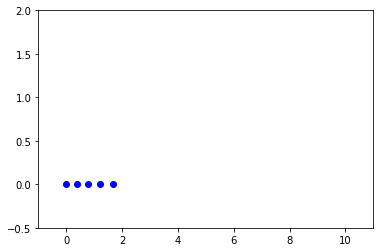

In [13]:
fig = plt.figure()
ax = plt.axes(xlim=(-1, 11), ylim=(-0.5, 2))
a = [0, 0,x1[1],0, x2[1]] , [0,0,0, 0,0]
print(a[1], a[0]);
line, = ax.plot( a[0], a[1] ,'bo')
# # line2, = ax.plot( x2[1], 0 ,'bo')


def middle(left, right):
    return [(right[0]-left[0])/2 + left[0], 0]



def init():
    middle1 = middle([0,0], [x1[0], 0])
    middle2 = middle([x1[0], 0], [x2[0], 0])
    line.set_data( [0,middle1[0],x1[0],middle2[0], x2[0]] , [0,0 ,0,0,0])
    # line.set_data(x2[0], 0)
    return line,


middle1 = middle([0,0], [x1[1], 0])
middle2 = middle([x1[1], 0], [x2[1], 0])

print(middle1, middle2)

# animation function.  This is called sequentially
def animate(i):
    middle1 = middle([0,0], [x1[i], 0])
    middle2 = middle([x1[i], 0], [x2[i], 0])
    line.set_data( [0,middle1[0], x1[i],middle2[0], x2[i]] , [0,0,0,0,0])
    # line.set_data(x2[i],0)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)


anim


In [60]:
import numpy as np

def coefficient(i, j):
  c = 0;
  l = abs(i - j)
  if l == 0: 
    c = 2
  if l == 1: 
    c = (-1);
  return c;

def fillMat(shapeDimentions):
  a = np.zeros(shape=(shapeDimentions,shapeDimentions))
  for idx, x in np.ndenumerate(a):
    for idy, y in np.ndenumerate(x):
      a[idx[0], idx[1]] = coefficient(idx[0], idx[1])

  a[a.shape[0] -1][ a.shape[1] -1] = 1
  return a


In [64]:
print(fillMat(2) *-1)


[[-2.  1.]
 [ 1. -1.]]


In [72]:


def vectorfield(w, t, p, M):
    print("m is ", M)
    """
    Defines the differential equations for the system of differential equations.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,z1,x2,z2]
        t :  time
        p :  vector of the parameters:
                  p = [m, mu, k, L]
    """
    # x1, z1, x2, z2 = w

    # could i just replcae this thing with an indexed version? 
    m, mu, k, L = p

    xes = []
    for id, x in enumerate(w):
      if (id % 2) == 0: 
        xes.append(x)
      # print(id, x);

    # print(xes)



    n = len(w)
    resV = []
    for id, el in enumerate(range(n)):
      # calculate for the last one is kinda tricky: 
      if (id % 2) == 0:
        # resV.append("w" + str(id + 1))
        resV.append(w[id+1])
      else:
        i = (id -1)/ 2 if ((id -1)/ 2 > 0) else 0
        # coef = 2 * W0 / (m * L ** 2)
        # print(M[int(i)], xes)
#       here we have x * m[i]
        # print("K is ", k)
        # print(-mu * w[id] + k * np.matmul(M[int(i)], xes))
        resV.append( (-mu * w[id] + k * np.matmul((M[int(i)] * -1), xes))/m)

        # print(k * np.matmul(M[int(i)], xes) -mu * w[id])
        # (-mu * z1 -2*k*x1 + k*x2) / m
        # print("z" + str(id))
        # 
        # xes * M[i]
        # j = (i - 1) if (i - 1> 0 ) else 0
        # index = (id - 3) if (id -3  > 0) else 0
        # resV.append("w[" + str(int(index)) + "] * M[" + str(int(i)) + "," + str(int(j)) + "]" )
  

    return (resV)

    # # Create f = (x1',y1',x2',y2'):
    # f = [w[1],
    #      (-mu * w[1] -2*k*w[0] + k*w[2]) / m,
    #      w[3],
    #      (-mu * w[3] + k * w[0] - k * w[2] + k*L)/m
    #      ]
    # return f

In [73]:
M = (fillMat(2) * -1)
print("MS is equal: ", M)
# p = [1.0, 2, 1337.0, 1]
# print("p is ", p)
# vectorfield([], t, p, M)
wsol = odeint(vectorfield, w0, t, args=(p,M),
              atol=abserr, rtol=relerr)

with open('reflector-dynamics.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

MS is equal:  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  [[-2.  1.]
 [ 1. -1.]]
m is  

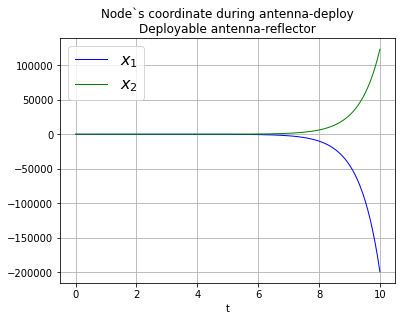

In [70]:
from numpy import loadtxt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

t, x1, z1, x2, z2 = loadtxt('reflector-dynamics.dat', unpack=True)

plt.figure(1, figsize=(6, 4.5))

plt.xlabel('t')
plt.grid(True)
# plt.hold(True)
lw = 1

plt.plot(t, x1, 'b', linewidth=lw)
plt.plot(t, x2, 'g', linewidth=lw)

plt.legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
plt.title('Node`s coordinate during antenna-deploy\nDeployable antenna-reflector')
plt.savefig('reflector\`s_coordinates.png', dpi=100)

